# CRYPTO_PUNKS

In [1]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv("Data_API.csv")
df.describe()

C:\Users\ankur\AppData\Local\Temp\ipykernel_7096\3898191936.py:1: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Data_API.csv")


,Price_Crypto,Price_USD
count,6.071027e+06,6.062744e+06
mean,6.574200e+02,1.463413e+02
std,1.217706e+06,5.488389e+03
min,0.000000e+00,1.514250e-16
25%,2.400000e-02,2.277600e-01
50%,4.100000e-01,1.426470e+00
75%,5.000000e+00,1.385100e+01
max,3.000000e+09,7.501893e+06


## Lets Clean the Dataset first

Dropping  Image columns due to sparse presence

In [18]:
df.drop(columns=['Image_url_1','Image_url_2','Image_url_3','Image_url_4'],inplace=True)

In [19]:
print(f"This is seller username absent: {df['Seller_username'].isna().sum()} off of {df['Seller_address'].count()}")
print(f"This is buyer username absent: {df['Buyer_username'].isna().sum()} off of {df['Buyer_address'].count()}")

This is seller username absent: 4977773 off of 6071027
This is buyer username absent: 5178164 off of 6071027


As the number of missing values is so high for username of buyer and seller:
    1. It signifies that major transactions are anonymouse
    2. We can choose to drop these fields or keep it to analyse if the ones with names go anonymouse down the line.

In [20]:
print(f"This is Description absent: {df['Description'].isna().sum()} off of {len(df['Description'])}")

This is Description absent: 4340298 off of 6071027


Description can be dropped as we cannot compute any data wrt that.

In [21]:
df.drop(columns=['Description'],inplace=True)

In [22]:
print(f"This is Collection absent: {df['Collection'].isna().sum()} off of {len(df['Collection'])}")
print(f"This is Market absent: {df['Market'].isna().sum()} off of {len(df['Market'])}")
print(f"This is Category absent: {df['Category'].isna().sum()} off of {len(df['Category'])}")

#df.keys()

This is Collection absent: 0 off of 6071027
This is Market absent: 0 off of 6071027
This is Category absent: 0 off of 6071027


We are now Good to go

## Partitioning

As the dataset is large(6mil), we are gonna partition our dataset in two, with motive being partition pre-2020, and post-2020. As in 2020, majority of crypto and NFTs Peaked.

In [23]:
# sort dataframe by time
df=df.sort_values(by=['Datetime_updated'])

In [24]:
df

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Price_Crypto,Crypto,Price_USD,Name,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
242722,NaN,1001.0,0x5c8a04e3174fed51f8cbe8f8ec77b6d5714343c3ebc6...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x672ec49f7f7eac25c3a2e651f67f579bb5da8936,NaN,0.009922,ETH,3.970675,NaN,Cryptokitties,Cryptokitties,2017-11-23 00:00:00,2017-11-23 18:44:21,NaN,"('Cryptokitties', '1001')",Cryptokittie,Art
242389,NaN,1315.0,0xc2c65a88f6335c505d40dae2db5b1b4bf35f7ba9f55b...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0xeaa9c0b9b295e9580721532d28cc2a68d7365be9,NaN,0.008108,ETH,3.244793,NaN,Cryptokitties,Cryptokitties,2017-11-23 00:00:00,2017-11-23 22:53:31,NaN,"('Cryptokitties', '1315')",Cryptokittie,Art
242390,NaN,1314.0,0xef5c442cf5626ae4286e0b2ce8996538456411190710...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0xdc2cf5cbfa31958ed32c3ace696ee6bf1a6a19f4,NaN,0.008478,ETH,3.392637,NaN,Cryptokitties,Cryptokitties,2017-11-23 00:00:00,2017-11-23 22:53:31,NaN,"('Cryptokitties', '1314')",Cryptokittie,Art
242391,NaN,1313.0,0x84741f2ae563e8b713d7b3bd2dcf8a570ae4070948d7...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0x01b24d8631caf2ed9385e440534fcbddc9cf962e,NaN,0.009825,ETH,3.931768,NaN,Cryptokitties,Cryptokitties,2017-11-23 00:00:00,2017-11-23 22:53:31,NaN,"('Cryptokitties', '1313')",Cryptokittie,Art
242392,NaN,1312.0,0x5ba4110fd00739f9054b4738aa75703c551cdcdce905...,0xba52c75764d6f594735dc735be7f1830cdf58ddf,NaN,0xfb8b5922f50b1522446ddc9f5a4a89113c77978d,NaN,0.008573,ETH,3.430710,NaN,Cryptokitties,Cryptokitties,2017-11-23 00:00:00,2017-11-23 22:53:31,NaN,"('Cryptokitties', '1312')",Cryptokittie,Art
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2397422,atomicassets,1099529741344,NaN,4rzsa.wam,NaN,yyxba.wam,NaN,0.390000,WAX,0.073983,NaN,alien.worlds,Atomic,2021-04-27 00:00:00,2021-04-27 16:18:10,NaN,"('alien.worlds', '1099529741344')",Alien,Games
2397421,atomicassets,1099529741612,NaN,mtbrw.wam,NaN,ac5ro.wam,NaN,0.560000,WAX,0.127008,NaN,alien.worlds,Atomic,2021-04-27 00:00:00,2021-04-27 16:18:11,NaN,"('alien.worlds', '1099529741612')",Alien,Games
2397420,atomicassets,1099528300098,NaN,wmibi.wam,NaN,pyqra.wam,NaN,23.500000,WAX,4.457950,NaN,alien.worlds,Atomic,2021-04-27 00:00:00,2021-04-27 16:18:11,NaN,"('alien.worlds', '1099528300098')",Alien,Games
2397434,atomicassets,1099529741517,NaN,knzsa.wam,NaN,h3kba.wam,NaN,0.400000,WAX,0.075880,NaN,alien.worlds,Atomic,2021-04-27 00:00:00,2021-04-27 16:18:09,NaN,"('alien.worlds', '1099529741517')",Alien,Games


In [25]:
split_val=2000000
time_df_1=df[:split_val]
time_df_2=df[split_val:]

In [26]:
time_df_1['Seller_address'].count()

2000000

In [27]:
time_df_2['Seller_address'].count()

4071027

In [28]:
date_range = str(time_df_1['Datetime_updated'].min()) + ' to ' +str(time_df_1['Datetime_updated'].max())
date_range

'2017-11-23 00:00:00 to 2020-07-25 00:00:00'

In [29]:
date_range = str(time_df_2['Datetime_updated'].min()) + ' to ' +str(time_df_2['Datetime_updated'].max())
date_range

'2020-07-25 00:00:00 to 2021-04-27 00:00:00'

We would be dealing with these 2 frames, split by pre2020 and post 2020.
According to our analysis, these 2 frames yield different behaviours.

## Analysis

### Market share

In [82]:
def compute_marketshare(df_p):
    return df_p['Market'].value_counts()
print(compute_marketshare(time_df_1))


OpenSea          1037135
Cryptokitties     715596
Godsunchained     230278
Decentraland       13746
Atomic              3245
Name: Market, dtype: int64


In [83]:
print(compute_marketshare(time_df_2))


Atomic           3182047
OpenSea           870127
Cryptokitties       9804
Godsunchained       5932
Decentraland        3117
Name: Market, dtype: int64


In [84]:
from cProfile import label
import matplotlib.pyplot as plt
def plot_py(df_p):
    market_data=compute_marketshare(df_p)
    plt.pie(market_data,labels=market_data.axes[0])
    plt.show()

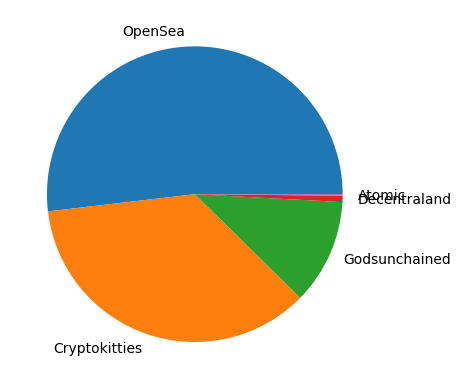

In [85]:
plot_py(time_df_1)

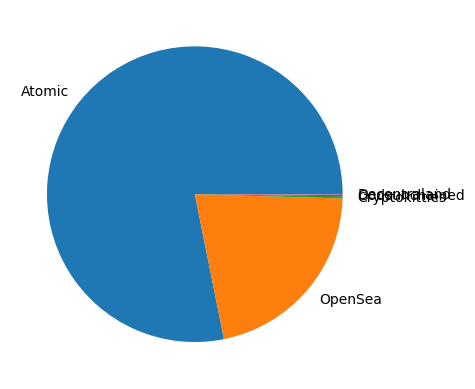

In [86]:
plot_py(time_df_2)

We can see that in time section before 2020, Opensea has totally dominated and further, Atomic has dominated. 
Next our analysis should be dependent upon this hypothesis.

### Category

In [34]:
def compute_category(df_p):
    return df_p['Category'].value_counts()

In [35]:
compute_category(time_df_1)

Art            1056570
Games           808598
Collectible      64613
Metaverse        34876
Other            31781
Utility           3562
Name: Category, dtype: int64

In [36]:
compute_category(time_df_2)

Games          1834416
Collectible    1541044
Art             415945
Other           240991
Metaverse        33496
Utility           5135
Name: Category, dtype: int64

In [37]:
from cProfile import label
import matplotlib.pyplot as plt
def plot_py_category(df_p):
    market_data=compute_category(df_p)
    plt.pie(market_data,labels=market_data.axes[0])
    plt.show()

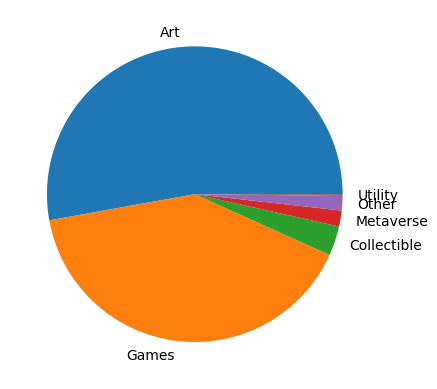

In [38]:
plot_py_category(time_df_1)

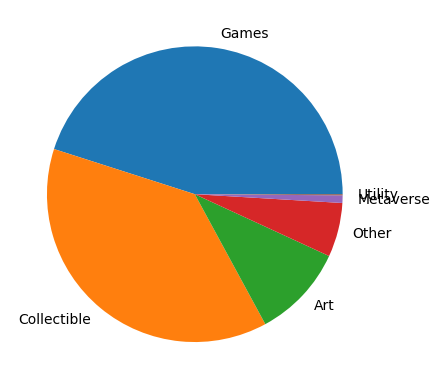

In [39]:
plot_py_category(time_df_2)

The share in transactions, in ART has gone down. Collectibles has increased drastically. Lets find out the same for the whole dataset.

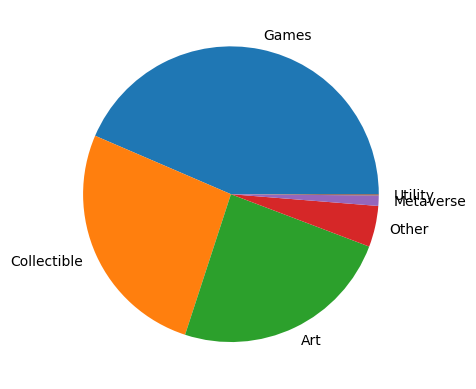

In [51]:
category_data=df['Category'].value_counts()
plt.pie(category_data,labels=category_data.axes[0])
plt.show()

In retrospective, Art gained tremendous popularity pre-2020 and saturated. Games has always been high, and might be the some of the safest investment options. Collectibles has gained huge popularity post-2020.

### Avg price of Transaction

In [67]:
# Helper function
def describe_arr(p_arr):
    arr=np.array(p_arr)
    arr=arr[~np.isnan(arr)]
    mean = np.mean(arr)
    median = np.median(arr)
 
    # measures of dispersion
    min = np.amin(arr)
    max = np.amax(arr)
    range = np.ptp(arr)
    variance = np.var(arr)
    sd = np.std(arr)
 
    print("Descriptive analysis")
    print("Measures of Central Tendency")
    print("Mean =", mean)
    print("Median =", median)
    print("Measures of Dispersion")
    print("Minimum =", min)
    print("Maximum =", max)
    print("Range =", range)
    print("Variance =", variance)
    print("Standard Deviation =", sd)

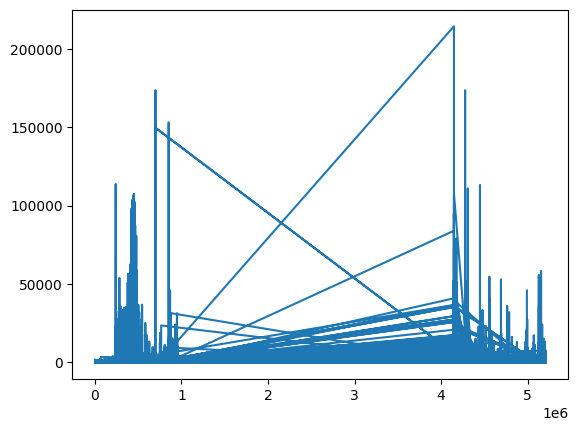

Descriptive analysis
Measures of Central Tendency
Mean = 34.21862467428138
Median = 2.4164213619791672
Measures of Dispersion
Minimum = 1.5142500000000002e-16
Maximum = 214275.60000000003
Range = 214275.60000000003
Variance = 321036.3308867082
Standard Deviation = 566.6006802737782


In [68]:
plt.plot(time_df_1['Price_USD'])
plt.show()
describe_arr(time_df_1['Price_USD'])

The highest value NFT transaction was $214K, pre-2020 and the mean value of a transaction was $34.

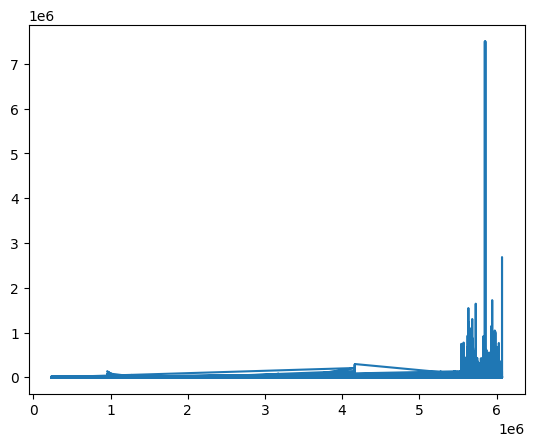

Descriptive analysis
Measures of Central Tendency
Mean = 201.41255929785586
Median = 1.04300475
Measures of Dispersion
Minimum = 1.314828535827e-15
Maximum = 7501893.0
Range = 7501893.0
Variance = 44750732.613737665
Standard Deviation = 6689.598838027409


In [73]:
plt.plot(time_df_2['Price_USD'])
plt.show()
describe_arr(time_df_2['Price_USD'])

The highest value NFT transaction was $7.5Mil, post-2020 and the mean value of a transaction was $201. Thats almost 600% rise

The second dataframe's price is so high, that the from 2017-20, it almost looks nothing with a peak price of just $200K. Lets try and findout, which Category has highest volume

In [42]:
price_data={"Games":[0,[]],"Collectible":[0,[]],"Art":[0,[]],"Metaverse":[0,[]],"Utility":[0,[]],"Other":[0,[]]}


In [44]:
# plot price_usd for each category individually.
count=0
for index,row in time_df_1.iterrows():
    price_data[row['Category']][0]+=1
    price_data[row['Category']][1].append(row['Price_USD'])
    

In [57]:
import math
count=0

for i in price_data['Collectible'][1]:
    if(math.isnan(i)):
        count+=1
count

300

In [59]:
print(len(price_data['Collectible'][1]))

64613


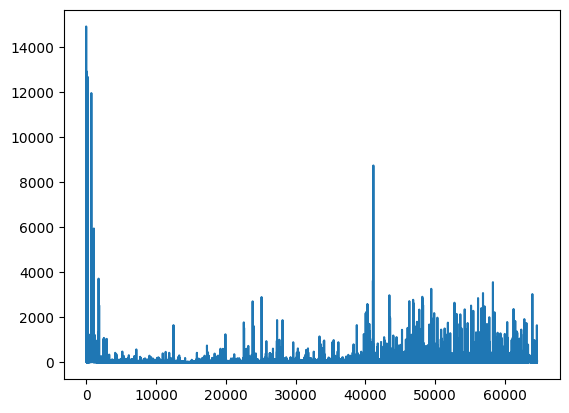

Descriptive analysis
Measures of Central Tendency
Mean = 33.1492564974572
Median = 8.089455000000001
Measures of Dispersion
Minimum = 9.558400000000002e-16
Maximum = 14917.91797743056
Range = 14917.91797743056
Variance = 35221.404837339556
Standard Deviation = 187.673665806739


In [71]:
price_data['Collectible'][1]
plt.plot(price_data['Collectible'][1])
plt.show()
describe_arr(price_data['Collectible'][1])

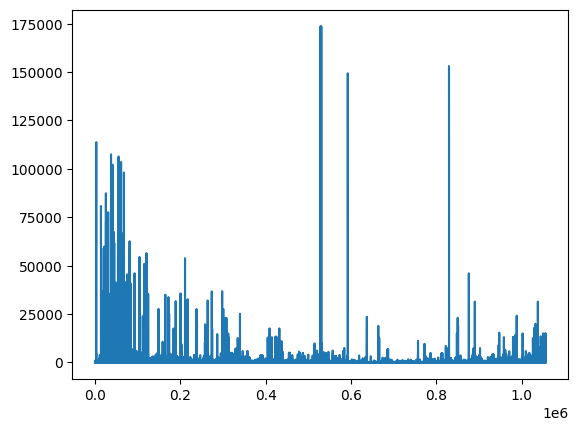

Descriptive analysis
Measures of Central Tendency
Mean = 33.647037677361006
Median = 3.697925
Measures of Dispersion
Minimum = 2.2646000000000004e-16
Maximum = 173559.0
Range = 173559.0
Variance = 360211.0011719365
Standard Deviation = 600.175808552741


In [70]:
plt.plot(price_data['Art'][1])
plt.show()
describe_arr(price_data['Art'][1])


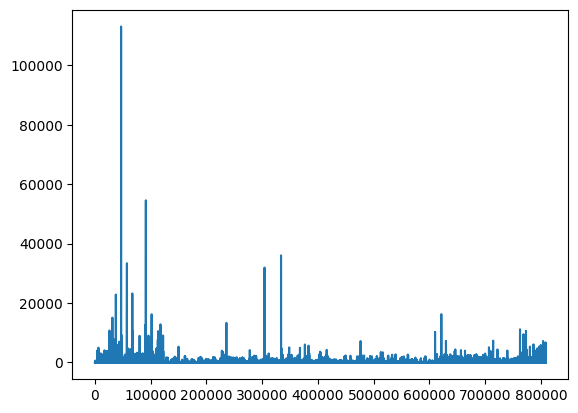

Descriptive analysis
Measures of Central Tendency
Mean = 13.757879658040027
Median = 0.704308845419
Measures of Dispersion
Minimum = 1.5142500000000002e-16
Maximum = 113096.785396059
Range = 113096.785396059
Variance = 36437.69997512486
Standard Deviation = 190.8866154949709


In [72]:
plt.plot(price_data['Games'][1])
plt.show()
describe_arr(price_data['Games'][1])

In [22]:
df['Price_USD'].describe()

count    6.062744e+06
mean     1.463413e+02
std      5.488389e+03
min      1.514250e-16
25%      2.277600e-01
50%      1.426470e+00
75%      1.385100e+01
max      7.501893e+06
Name: Price_USD, dtype: float64

### Finding % of unique trades

We segment the data according to category and try to make sense, regarding how much of the population are first time buyers and sellers.

In [37]:
# Games -> len(df['Seller_address'].unique())/len(df['Seller_address'])
unique_sell_segmented={'Games':0,'Collectible':0,'Art':0,'Metaverse':0,'Utility':0,'Other':0}
for index, row in df.iterrows():
    # check if the user is unique or not
    unique_sell_segmented[row['Category']]+=1

Games          2643014
Collectible    1605657
Art            1472515
Other           272772
Metaverse        68372
Utility           8697
Name: Category, dtype: int64

In [30]:
# Finding % of first time sellers=> % of unique seller addresss
unique_sellers=len(df['Seller_address'].unique())/len(df['Seller_address'])
unique_sellers

0.05154317383203863

In [31]:
unique_buyers=len(df['Buyer_address'].unique())/len(df['Buyer_address'])
unique_buyers

0.05902592757370376

Only 5% of the buyers and sellers are unique. So out of a 100 transactions, there are only 5 people making all the transactions. So it is almost a PUN to be called decentralized.